Resources:
https://github.com/savarin/pyconuk-introtutorial
http://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  


In [2]:

train = pd.read_csv('train2016.csv')
test = pd.read_csv('test2016.csv')


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5568 entries, 0 to 5567
Columns: 108 entries, USER_ID to Q96024
dtypes: float64(1), int64(1), object(106)
memory usage: 4.6+ MB


In [3]:
train.head(10)

,USER_ID,YOB,Gender,Income,HouseholdStatus,EducationLevel,Party,Q124742,Q124122,Q123464,...,Q100010,Q99716,Q99581,Q99480,Q98869,Q98578,Q98059,Q98078,Q98197,Q96024
0,1,1938,Male,NaN,Married (w/kids),NaN,Democrat,No,NaN,No,...,Yes,No,No,NaN,No,NaN,Only-child,No,No,Yes
1,4,1970,Female,"over $150,000",Domestic Partners (w/kids),Bachelor's Degree,Democrat,NaN,Yes,No,...,NaN,NaN,NaN,No,No,No,Only-child,Yes,No,No
2,5,1997,Male,"$75,000 - $100,000",Single (no kids),High School Diploma,Republican,NaN,Yes,Yes,...,Yes,No,No,No,Yes,No,Yes,No,Yes,No
3,8,1983,Male,"$100,001 - $150,000",Married (w/kids),Bachelor's Degree,Democrat,No,Yes,No,...,No,No,No,Yes,Yes,No,Yes,No,No,Yes
4,9,1984,Female,"$50,000 - $74,999",Married (w/kids),High School Diploma,Republican,No,Yes,No,...,Yes,No,No,Yes,No,No,Yes,No,No,Yes
5,10,1997,Female,"over $150,000",Single (no kids),Current K-12,Democrat,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11,1983,Male,"$25,001 - $50,000",Married (no kids),Current Undergraduate,Democrat,NaN,NaN,NaN,...,Yes,NaN,NaN,NaN,No,No,Yes,No,Yes,Yes
7,12,1996,Male,"$75,000 - $100,000",Single (no kids),Current K-12,Republican,Yes,Yes,No,...,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes
8,13,NaN,Male,NaN,Single (no kids),Current K-12,Republican,No,NaN,Yes,...,Yes,No,No,Yes,Yes,No,Yes,NaN,NaN,Yes
9,15,1981,Female,"$50,000 - $74,999",Married (w/kids),NaN,Republican,No,No,No,...,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No


In [16]:
test.head(10)

,USER_ID,YOB,Gender,Income,HouseholdStatus,EducationLevel,Q124742,Q124122,Q123464,Q123621,...,Q100010,Q99716,Q99581,Q99480,Q98869,Q98578,Q98059,Q98078,Q98197,Q96024
0,2,1985,Female,"$25,001 - $50,000",Single (no kids),Master's Degree,NaN,Yes,No,Yes,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1,3,1983,Male,"$50,000 - $74,999",Married (w/kids),Current Undergraduate,NaN,NaN,No,NaN,...,NaN,NaN,NaN,NaN,Yes,NaN,Yes,Yes,No,Yes
2,6,1995,Male,"$75,000 - $100,000",Single (no kids),Current K-12,NaN,NaN,NaN,NaN,...,No,No,No,Yes,Yes,No,Yes,No,Yes,Yes
3,7,1980,Female,"$50,000 - $74,999",Single (no kids),Master's Degree,Yes,Yes,No,Yes,...,Yes,No,No,No,Yes,No,Yes,No,No,Yes
4,14,1980,Female,NaN,Married (no kids),Current Undergraduate,NaN,Yes,No,Yes,...,Yes,No,No,Yes,No,No,Yes,No,No,No
5,28,1973,Male,"over $150,000",Married (no kids),Master's Degree,No,Yes,No,Yes,...,Yes,No,No,Yes,No,No,Yes,No,No,Yes
6,29,1968,Female,"$50,000 - $74,999",Single (no kids),Bachelor's Degree,NaN,NaN,NaN,NaN,...,Yes,NaN,No,Yes,Yes,NaN,Yes,No,Yes,NaN
7,37,1961,Male,"over $150,000",Domestic Partners (no kids),High School Diploma,NaN,Yes,No,Yes,...,Yes,No,NaN,NaN,NaN,No,Yes,NaN,NaN,NaN
8,44,1989,Female,"under $25,000",Single (no kids),High School Diploma,NaN,Yes,No,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No
9,56,1975,Male,"$75,000 - $100,000",Married (w/kids),Bachelor's Degree,No,NaN,No,Yes,...,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No


In [34]:
train.isnull().sum()

USER_ID               0
YOB                   0
Gender                0
Income             1028
HouseholdStatus     450
EducationLevel      866
Party                 0
Q124742            3453
Q124122            2471
Q123464            2305
Q123621            2399
Q122769            2205
Q122770            2063
Q122771            2047
Q122120            2034
Q121699            1824
Q121700            1861
Q120978            1849
Q121011            1809
Q120379            1878
Q120650            1812
Q120472            1941
Q120194            2068
Q120012            1865
Q120014            2047
Q119334            1964
Q119851            1779
Q119650            1906
Q118892            1756
Q118117            1862
                   ... 
Q106272            2171
Q106388            2245
Q106389            2299
Q106042            2206
Q105840            2288
Q105655            2082
Q104996            2100
Q103293            2120
Q102906            2249
Q102674            2281
Q102687         

In [17]:
train['Income'].value_counts(dropna=False)

NaN                    1028
$50,000 - $74,999       818
$100,001 - $150,000     768
under $25,000           768
$75,000 - $100,000      740
over $150,000           738
$25,001 - $50,000       708
dtype: int64

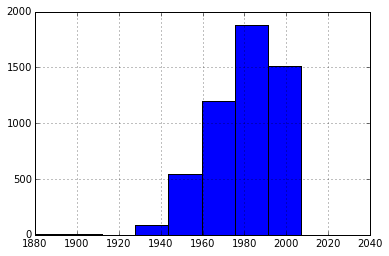

In [23]:
train['YOB'].hist()

In [25]:
mean_yob = train['YOB'].mean()
mean_yob

1979.6563514804202

In [26]:
train['EducationLevel'].value_counts(dropna=False)

Bachelor's Degree        1206
NaN                       866
Current K-12              831
Current Undergraduate     767
High School Diploma       681
Master's Degree           639
Associate's Degree        380
Doctoral Degree           198
dtype: int64

In [27]:
train['HouseholdStatus'].value_counts(dropna=False)

Single (no kids)               2431
Married (w/kids)               1594
Married (no kids)               652
NaN                             450
Single (w/kids)                 200
Domestic Partners (no kids)     180
Domestic Partners (w/kids)       61
dtype: int64

In [28]:
train['Gender'].value_counts(dropna=False)

Male      3325
Female    2130
NaN        113
dtype: int64

In [22]:
train_user_id = train['USER_ID']
test_user_id = test['USER_ID']
train_size = len(train)
test_size = len(test)
print train_size
print test_size

5568
1392


## Preprocessing

In [90]:
train = train.drop(['USER_ID'], axis = 1)
test = test.drop(['USER_ID'], axis = 1)
train_y = train['Party']
train_x = train.drop(['Party'], axis = 1)

In [91]:
all_x = pd.concat([train_x, test])
all_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6960 entries, 0 to 1391
Columns: 106 entries, YOB to Q96024
dtypes: float64(1), object(105)
memory usage: 5.7+ MB


In [92]:

all_x['YOB'] = all_x['YOB'].fillna(1980)
all_x['Gender'] = all_x['Gender'].fillna('Male')
all_x['Income']  = all_x['Income'].fillna('$50,000 - $74,999')
all_x['HouseholdStatus'] = all_x['HouseholdStatus'].fillna('Single (no kids)')
all_x['EducationLevel'] = all_x['EducationLevel'].fillna('Bachelor\'s Degree')
# The rest are questons
all_x  = all_x.fillna('Unknown')

In [93]:
all_x['Income'] = all_x['Income'].map({
        'under $25,000': 0, 
        '$25,001 - $50,000': 1,
        '$50,000 - $74,999': 2,
        '$75,000 - $100,000': 3,
        '$100,001 - $150,000': 4,
        'over $150,000': 5
    }).astype(int)

In [94]:
all_x['EducationLevel'] = all_x['EducationLevel'].map({
        'Current K-12': 0, 
        'High School Diploma': 1,
        'Associate\'s Degree': 2,
        'Current Undergraduate': 3,
        'Bachelor\'s Degree': 4,
        'Master\'s Degree': 5,
        'Doctoral Degree': 6
    }).astype(int)

In [95]:
all_x_dum = pd.get_dummies(all_x)

In [96]:
all_x_dum.head()

,YOB,Income,EducationLevel,Gender_Female,Gender_Male,HouseholdStatus_Domestic Partners (no kids),HouseholdStatus_Domestic Partners (w/kids),HouseholdStatus_Married (no kids),HouseholdStatus_Married (w/kids),HouseholdStatus_Single (no kids),...,Q98059_Yes,Q98078_No,Q98078_Unknown,Q98078_Yes,Q98197_No,Q98197_Unknown,Q98197_Yes,Q96024_No,Q96024_Unknown,Q96024_Yes
0,1938,2,4,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,1970,5,4,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2,1997,3,1,0,1,0,0,0,0,1,...,1,1,0,0,0,0,1,1,0,0
3,1983,4,4,0,1,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,1
4,1984,2,1,1,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,1


In [97]:
#all_x_dum = pd.get_dummies(all_x)
train_x = all_x_dum[:train_size]
test = all_x_dum[train_size:]

In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model = model.fit(train_x, train_y)
train_prediction = model.predict(train_x)
print train_prediction
print "prediction accuracy:", np.sum(train_y == train_prediction)*1./len(train_prediction)

['Democrat' 'Democrat' 'Republican' ..., 'Democrat' 'Republican'
 'Republican']
prediction accuracy: 0.999820402299


In [39]:
test_prediction = model.predict(test)

In [42]:
test_prediction = pd.DataFrame(test_prediction, columns=['Predictions'])
submission = pd.concat([test_user_id, test_prediction], axis=1)

In [43]:
submission.head(10)

,USER_ID,Predictions
0,2,Democrat
1,3,Republican
2,6,Republican
3,7,Democrat
4,14,Democrat
5,28,Republican
6,29,Democrat
7,37,Republican
8,44,Democrat
9,56,Democrat


In [44]:
submission.to_csv('submission_random_forest_v1.csv', index=False)
# 0.63362

## GBM

In [62]:
def modelfit(alg, train_x, train_y, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(train_x, train_y)
        
    #Predict training set:
    dtrain_predictions = alg.predict(train_x)
    dtrain_predprob = alg.predict_proba(train_x)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, train_x, train_y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(train_y.values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(train_y, dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        # print alg.feature_importances_
        # for panda 1.17
        #feat_imp = pd.Series(alg.feature_importances_, list(train_x.columns.values)).sort_values(ascending=False)
        feat_imp = pd.Series(alg.feature_importances_, train_x.columns.values)
        feat_imp.sort(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        print feat_imp

In [48]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [50]:
train_y_int = train_y.map({
        'Republican': 0, 
        'Democrat': 1
    }).astype(int)


Model Report
Accuracy : 0.7011
AUC Score (Train): 0.782328
CV Score : Mean - 0.6753708 | Std - 0.02041881 | Min - 0.6362916 | Max - 0.6933513
Q109244_Yes                                    0.069582
YOB                                            0.054859
Q109244_No                                     0.025774
Q98197_No                                      0.022674
Q115611_Yes                                    0.022209
EducationLevel                                 0.018399
Q98869_No                                      0.015467
HouseholdStatus_Domestic Partners (no kids)    0.014367
Income                                         0.013452
Q113181_Yes                                    0.013398
HouseholdStatus_Married (w/kids)               0.013075
Q120379_Yes                                    0.012176
Q116881_Right                                  0.012097
Q119851_No                                     0.012035
Q113181_No                                     0.010613
Q100689_Yes      

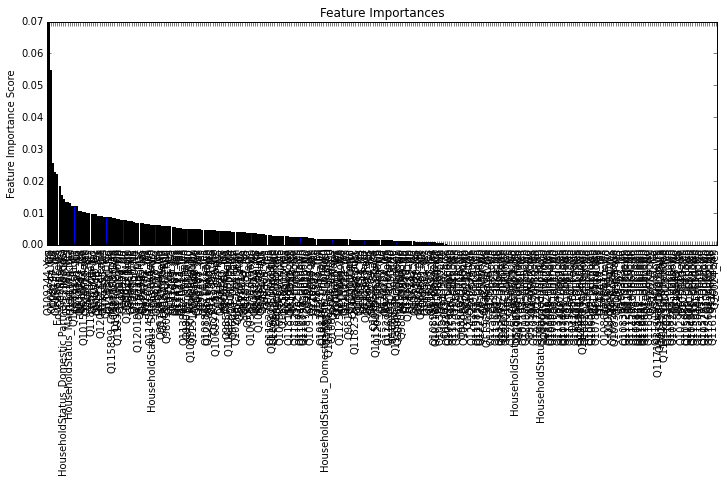

In [63]:
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train_x, train_y_int)

In [79]:
gbm0

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=10, subsample=1.0, verbose=0, warm_start=False)

In [73]:
def save_submission(test_user_id, predictions, filename):
    predictions_string = pd.DataFrame(predictions, columns=['Predictions'])['Predictions'].map({
        0: 'Republican', 
        1: 'Democrat'
    }).astype(str)
    submission = pd.concat([test_user_id, predictions_string], axis=1)
    submission.to_csv(filename, index=False)

In [65]:
test_prediction = gbm0.predict(test)
save_submission(test_user_id, test_prediction, 'submission_gbm0.csv')

In [98]:
gbm0_feat_imp = pd.Series(gbm0.feature_importances_, train_x.columns.values)
gbm0_feat_imp.sort(ascending=False)
feat_imp.to_csv('gmb0_feature_importances.csv')

In [84]:
#Choose all predictors except target & IDcols
param_test1 = {'n_estimators':range(20,101,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_x,train_y_int)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=8, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=10, subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, loss_func=None, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=0)

In [85]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.67778, std: 0.01325, params: {'n_estimators': 20},
  mean: 0.67941, std: 0.01794, params: {'n_estimators': 30},
  mean: 0.68224, std: 0.01672, params: {'n_estimators': 40},
  mean: 0.68242, std: 0.01642, params: {'n_estimators': 50},
  mean: 0.68322, std: 0.01726, params: {'n_estimators': 60},
  mean: 0.68247, std: 0.01805, params: {'n_estimators': 70},
  mean: 0.68277, std: 0.01992, params: {'n_estimators': 80},
  mean: 0.68273, std: 0.01995, params: {'n_estimators': 90},
  mean: 0.68357, std: 0.02064, params: {'n_estimators': 100}],
 {'n_estimators': 100},
 0.68357458392939274)

In [86]:
param_test4 = {'max_features':range(10,321,20)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=100,random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train_x,train_y_int)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.68531, std: 0.01123, params: {'max_features': 10},
  mean: 0.68747, std: 0.01412, params: {'max_features': 30},
  mean: 0.68376, std: 0.01842, params: {'max_features': 50},
  mean: 0.68411, std: 0.01651, params: {'max_features': 70},
  mean: 0.68411, std: 0.02048, params: {'max_features': 90},
  mean: 0.67847, std: 0.01966, params: {'max_features': 110},
  mean: 0.67993, std: 0.01882, params: {'max_features': 130},
  mean: 0.68389, std: 0.01604, params: {'max_features': 150},
  mean: 0.68055, std: 0.01770, params: {'max_features': 170},
  mean: 0.68114, std: 0.02003, params: {'max_features': 190},
  mean: 0.68153, std: 0.01725, params: {'max_features': 210},
  mean: 0.67863, std: 0.01659, params: {'max_features': 230},
  mean: 0.68203, std: 0.01663, params: {'max_features': 250},
  mean: 0.67831, std: 0.01747, params: {'max_features': 270},
  mean: 0.68149, std: 0.01764, params: {'max_features': 290},
  mean: 0.67957, std: 0.01884, params: {'max_features': 310}],
 {'max_featu

In [88]:
gbm1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10, max_features=30)



Model Report
Accuracy : 0.6809
AUC Score (Train): 0.749394
CV Score : Mean - 0.6874176 | Std - 0.01471941 | Min - 0.6585831 | Max - 0.6998819
Q109244_Yes                                    0.068442
Q109244_No                                     0.036301
Q113181_Yes                                    0.032541
Q115611_Yes                                    0.030056
YOB                                            0.025950
Q98197_No                                      0.022569
Q115611_No                                     0.021354
Q118232_Idealist                               0.016782
HouseholdStatus_Domestic Partners (no kids)    0.016475
Q116881_Right                                  0.015714
Q98869_No                                      0.015440
Q101163_Mom                                    0.014887
Q113181_No                                     0.013403
Gender_Female                                  0.013162
Q115899_Circumstances                          0.012503
Income           

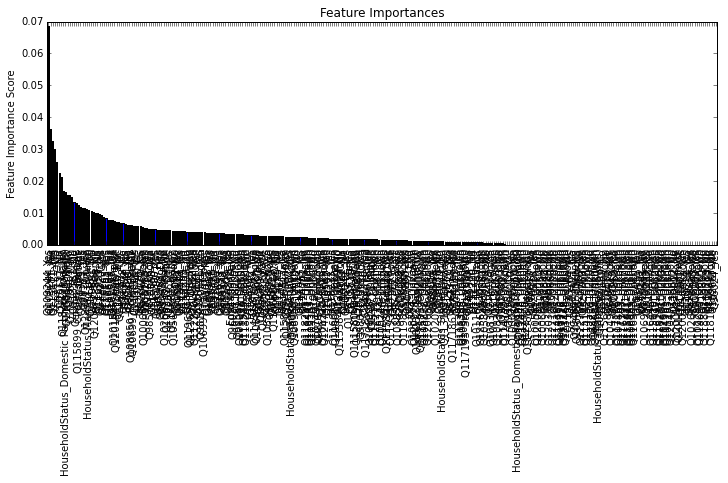

In [89]:
modelfit(gbm1, train_x, train_y_int)

# Select few features

In [104]:
features = set()
for feat in gbm0_feat_imp.index[:40]:
    features.add(feat.split('_')[0])
features

{'EducationLevel',
 'Gender',
 'HouseholdStatus',
 'Income',
 'Q100689',
 'Q101163',
 'Q101596',
 'Q104996',
 'Q108855',
 'Q109244',
 'Q110740',
 'Q111220',
 'Q113181',
 'Q114748',
 'Q115195',
 'Q115390',
 'Q115611',
 'Q115899',
 'Q116601',
 'Q116881',
 'Q116953',
 'Q118232',
 'Q119334',
 'Q119650',
 'Q119851',
 'Q120379',
 'Q120472',
 'Q123621',
 'Q98078',
 'Q98197',
 'Q98869',
 'Q99480',
 'YOB'}

In [106]:
all_x_feat1 = all_x[list(features)]

In [107]:
all_x_feat1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6960 entries, 0 to 1391
Data columns (total 33 columns):
Q120472            6960 non-null object
Q98869             6960 non-null object
Income             6960 non-null int64
Q119650            6960 non-null object
Q100689            6960 non-null object
Q114748            6960 non-null object
Q115195            6960 non-null object
Q98197             6960 non-null object
Q109244            6960 non-null object
Q115390            6960 non-null object
Q119334            6960 non-null object
Q116881            6960 non-null object
Q98078             6960 non-null object
Q110740            6960 non-null object
Gender             6960 non-null object
Q111220            6960 non-null object
Q118232            6960 non-null object
Q120379            6960 non-null object
Q104996            6960 non-null object
YOB                6960 non-null float64
Q99480             6960 non-null object
Q113181            6960 non-null object
Q115899      

In [108]:
all_x_feat1_dum = pd.get_dummies(all_x_feat1)
feat1_train_x = all_x_feat1_dum[:train_size]
feat1_test = all_x_feat1_dum[train_size:]

In [110]:
feat1_train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5568 entries, 0 to 5567
Data columns (total 95 columns):
Income                                         5568 non-null int64
YOB                                            5568 non-null float64
EducationLevel                                 5568 non-null int64
Q120472_Art                                    5568 non-null float64
Q120472_Science                                5568 non-null float64
Q120472_Unknown                                5568 non-null float64
Q98869_No                                      5568 non-null float64
Q98869_Unknown                                 5568 non-null float64
Q98869_Yes                                     5568 non-null float64
Q119650_Giving                                 5568 non-null float64
Q119650_Receiving                              5568 non-null float64
Q119650_Unknown                                5568 non-null float64
Q100689_No                                     5568 non-null float64



Model Report
Accuracy : 0.6861
AUC Score (Train): 0.758983
CV Score : Mean - 0.6826904 | Std - 0.01949432 | Min - 0.6440986 | Max - 0.6964519
YOB                                            0.108238
Q109244_Yes                                    0.068199
Q98197_No                                      0.031111
Income                                         0.029363
Q109244_No                                     0.029000
Q115611_Yes                                    0.026170
Q98869_No                                      0.023289
EducationLevel                                 0.021790
Q120472_Science                                0.019141
HouseholdStatus_Domestic Partners (no kids)    0.018776
Q98078_Yes                                     0.017959
Q101596_Unknown                                0.017593
Q119851_No                                     0.017449
Q116881_Right                                  0.017235
HouseholdStatus_Married (w/kids)               0.016989
Q110740_PC       

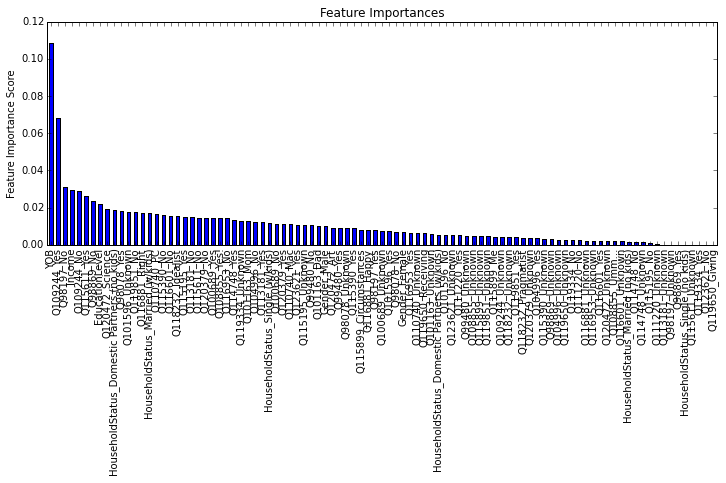

In [109]:
feat1_gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, feat1_train_x, train_y_int)

In [112]:
param_test4 = {'max_features':range(5,96,5)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=100,random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(feat1_train_x,train_y_int)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.69099, std: 0.01541, params: {'max_features': 5},
  mean: 0.68988, std: 0.01851, params: {'max_features': 10},
  mean: 0.69108, std: 0.01905, params: {'max_features': 15},
  mean: 0.68931, std: 0.01692, params: {'max_features': 20},
  mean: 0.68935, std: 0.01830, params: {'max_features': 25},
  mean: 0.68585, std: 0.02037, params: {'max_features': 30},
  mean: 0.68886, std: 0.01884, params: {'max_features': 35},
  mean: 0.68541, std: 0.01810, params: {'max_features': 40},
  mean: 0.68690, std: 0.01812, params: {'max_features': 45},
  mean: 0.68231, std: 0.01747, params: {'max_features': 50},
  mean: 0.68668, std: 0.01974, params: {'max_features': 55},
  mean: 0.68560, std: 0.01918, params: {'max_features': 60},
  mean: 0.68298, std: 0.01850, params: {'max_features': 65},
  mean: 0.68504, std: 0.01969, params: {'max_features': 70},
  mean: 0.68551, std: 0.01820, params: {'max_features': 75},
  mean: 0.68298, std: 0.01994, params: {'max_features': 80},
  mean: 0.68320, std: 0.0


Model Report
Accuracy : 0.6756
AUC Score (Train): 0.745521
CV Score : Mean - 0.691077 | Std - 0.01905097 | Min - 0.6529896 | Max - 0.7014713
YOB                                            0.088891
Q109244_Yes                                    0.063682
Q109244_No                                     0.038562
Q115611_Yes                                    0.035294
Q98197_No                                      0.029890
Income                                         0.026467
Q113181_Yes                                    0.023483
Q118232_Idealist                               0.020430
Q120472_Science                                0.019336
HouseholdStatus_Domestic Partners (no kids)    0.018821
Q115611_No                                     0.018457
Q98869_No                                      0.018133
HouseholdStatus_Married (w/kids)               0.018123
Q119851_Yes                                    0.017950
EducationLevel                                 0.017750
Q120379_Yes       

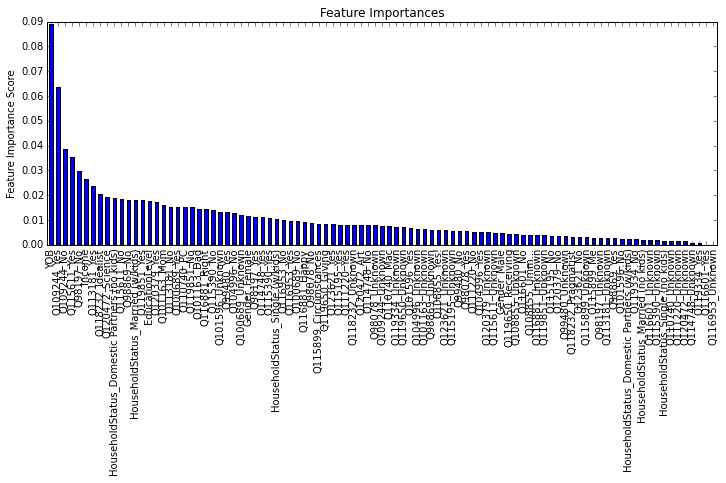

In [115]:
feat1_gbm1 = GradientBoostingClassifier(random_state=10,max_features= 15)
modelfit(feat1_gbm1, feat1_train_x, train_y_int)

In [117]:
save_submission(test_user_id, feat1_gbm1.predict(feat1_test), 'submission_feat1_gbm1.csv')

In [3]:
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute

Using Theano backend.
